## **Philosophy of Transfer Learning**
- Transfer learning involves using models trained on one problem as a starting point on a related problem. The weights in re-used layers may be used as the starting point for the training process and adapted in response to the new problem. This usage treats transfer learning as a type of weight initialization scheme. This may be useful when the first related problem has a lot more labeled data than the problem of interest and the similarity in the structure of the problem may be useful in both contexts.
- Transfer learning is flexible, allowing the use of pre-trained models directly, as feature extraction preprocessing, and integrated into entirely new models.
- Transfer learning has the benefit of decreasing the training time for a neural network model and can result in lower generalization error.
- Keras provides convenient access to many top performing models on the ImageNet image recognition tasks such as VGG, Inception, and ResNet.



**We can summarize some of these usage patterns as follows:**

Classifier: The pre-trained model is used directly to classify new images.
Standalone Feature Extractor: The pre-trained model, or some portion of the model, is used to pre-process images and extract relevant features.
Integrated Feature Extractor: The pre-trained model, or some portion of the model, is integrated into a new model, but layers of the pre-trained model are frozen during training.
Weight Initialization: The pre-trained model, or some portion of the model, is integrated into a new model, and the layers of the pre-trained model are trained in concert with the new model.


**Models for Transfer Learning**
There are perhaps a dozen or more top-performing models for image recognition that can be downloaded and used as the basis for image recognition and related computer vision tasks.

Perhaps three of the more popular models are as follows:

* VGG (e.g. VGG16 or VGG19).
* GoogLeNet (e.g. InceptionV3).
* Residual Network (e.g. ResNet50)

These models are both widely used for transfer learning both because of their performance, but also because they were examples that introduced specific architectural innovations, namely consistent and repeating structures (VGG), inception modules (GoogLeNet), and residual modules (ResNet).

Source:
https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [0]:
#Download kaggle.json from Kaggle -- MyAccount -- Create New API Token - auto downloads as "kaggle.json
#Import json into notebook
from google.colab import files

In [3]:
# Browse to downloaded kaggle.json and upload
files.upload()
# File will be uploaded to content folder on left

{}

In [0]:
#Setup Kaggle DIR; copy json file ; chmod
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 75 Nov 25 00:15 kaggle.json
{"username":"mohammedsaadahmad03","key":"79cbdad15436a1eb3abf15777dce8ac7"}

In [0]:
#! rm -rf sample_submission.csv
#! rm -rf test.zip
#! rm -rf train.zip
!ls

kaggle.json  sample_data


In [0]:
#Install kaggle packages
!pip install -q kaggle
!pip install -q kaggle-cli

#List Kaggle DataSets
#!kaggle datasets list

#List Kaggle Competitions
#!kaggle competitions list

#list files in a dataset /competition using string pattern
!kaggle competitions list -s "Dogs vs. Cats Redux: Kernels Edition"

     |████████████████████████████████| 81kB 4.1MB/s 
     |████████████████████████████████| 5.3MB 11.3MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 112kB 73.2MB/s 
     |████████████████████████████████| 112kB 76.0MB/s 
ref                                 deadline             category       reward  teamCount  userHasEntered  
----------------------------------  -------------------  ----------  ---------  ---------  --------------  
dogs-vs-cats-redux-kernels-edition  2017-03-02 23:59:00  Playground  Knowledge       1314            True  


In [0]:
!kaggle --version
#If it is below 1.5.6, please update with "! pip install -U kaggle"
! pip install -U kaggle

Kaggle API 1.5.4
Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 95% 257M/271M [00:03<00:00, 65.4MB/s]
100% 271M/271M [00:03<00:00, 72.2MB/s]
100% 542M/544M [00:08<00:00, 64.7MB/s]
100% 544M/544M [00:08<00:00, 66.7MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 94.7MB/s]


In [0]:
# Create directory for storing downloaded raw data
!mkdir raw_data

#Extract Test and Training data into raw directory
!unzip test.zip -d raw_data/
!unzip train.zip -d raw_data/

## Define libraries and packages which will be used for modelling and data processing

In [0]:
#%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)

# Original List of libraries

import random              # import shuffle; mixing up or currently ordered data that might lead our network astray in training.
import os                  # dealing with directories
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import pandas as pd
from tqdm import tqdm      # Percentage bar for tasks

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils


# New libraries
from keras.preprocessing.image import ImageDataGenerator
#In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.


1.15.0


Using TensorFlow backend.


In [0]:
# Restart runtime using 'Runtime' -> 'Restart runtime...'  to switch TensorFlow versions after import
print(tensorflow.__version__)

1.15.0


They are available via the Applications API, and include functions to load a model with or without the pre-trained weights, and prepare data in a way that a given model may expect (e.g. scaling of size and pixel values).

The first time a pre-trained model is loaded, Keras will download the required model weights, which may take some time given the speed of your internet connection. Weights are stored in the .keras/models/ directory under your home directory and will be loaded from this location the next time that they are used.



https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html


https://www.kaggle.com/anjanatiha/classification-using-keras-accuracy-100

https://www.kaggle.com/shivamb/cnn-architectures-vgg-resnet-inception-tl

https://www.kaggle.com/gpreda/cats-or-dogs-using-cnn-with-transfer-learning


https://www.kaggle.com/overload10/transfer-learning-using-inception-on-full-data



## Pre-processing and Data Preparation

In [0]:
# Processing training and test data:

from tqdm import tqdm, trange
from time import sleep


TRAIN_DIR = 'raw_data/train/'
TEST_DIR = 'raw_data/test/'

# Resolution for images (64 by 64)
ROWS = 160 #160, 64
COLS = 160 #160, 64
CHANNELS = 3

# Stores path of each image; Format of each line item: 'raw_data/train/dog.10506.jpg'
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

# slice datasets for memory efficiency on Kaggle Kernels, delete if using full dataset
#train_images = train_dogs[:1000] + train_cats[:1000]
random.shuffle(train_images)
#test_images =  test_images[:25]


def read_image(file_path):
    image = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(image, (ROWS, COLS), interpolation=cv2.INTER_CUBIC) # changed img to image

def prep_data(images):
    count = len(images)
    # Define/Initialize nd array which store resized images
    data = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.uint8)

    # Calculate the total files count (Altermate method)
    #filecounter = 0
    #for filepath in enumerate(images):
    #  filecounter += 1

    for i, image_file in tqdm(enumerate(images),total=count, unit="files"):
        # Image Shape = (64, 64, 3)
        image = read_image(image_file)
        data[i] = image #Original: data[i] = image.T

    #   if i%500 == 0: print('Processed {} of {}'.format(i, count))
    return data

def prep_data_Transpose(images):
    count = len(images)
    # Define/Initialize nd array which store resized images
    data = np.ndarray((count, CHANNELS,ROWS, COLS), dtype=np.uint8) # original

    for i, image_file in tqdm(enumerate(images),total=count, unit="files"):
        # Image Shape = (64, 64, 3)
        image = read_image(image_file) 
        data[i] = image.T
    return data

train = prep_data(train_images)
test = prep_data(test_images)
trainTranspose = prep_data_Transpose(train_images)

print("\nTrain shape: {}".format(train.shape))
print("\nTrain shape (Transposed): {}".format(trainTranspose.shape))
print("\nTest shape: {}".format(test.shape))

100%|██████████| 25000/25000 [00:53<00:00, 465.04files/s]


Train shape: (25000, 160, 160, 3)

Train shape (Transposed): (25000, 3, 160, 160)

Test shape: (12500, 160, 160, 3)


## Validate and inspect data preparation outcome:

Text(0.5, 1.0, 'Count of training data for Cat and Dog classes')

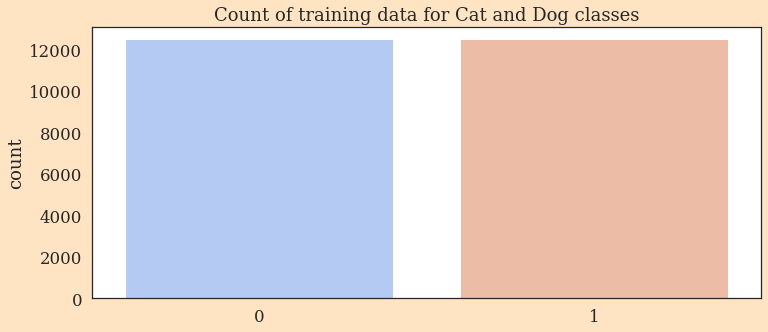

In [0]:
# Label training images as Cats or Dogs
# Inspect the balance of classes in training data (There should be no class imbalance)
# Visualize the count of training data for Cat and Dog classes

plt.figure(figsize=[12,5],facecolor='bisque')
sns.set(style="white",font_scale=1.5)
plt.rcParams['font.family'] = 'serif'

training_label = []
for i in train_images:
    if 'dog' in i: training_label.append(1)
    else: training_label.append(0)
sns.countplot(training_label,palette="coolwarm")
plt.title('Count of training data for Cat and Dog classes')

#https://matplotlib.org/3.1.0/gallery/color/named_colors.html

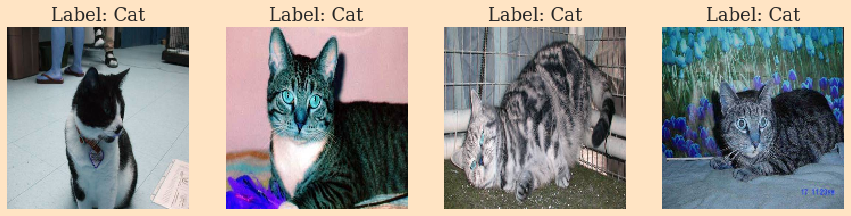

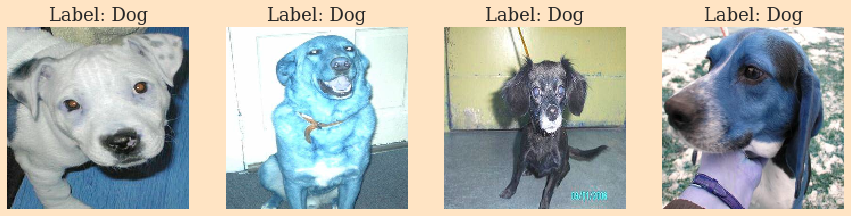

In [0]:
# See sample images from the dataset

def plot_figure(dataset,count,str_label):
  fig, axs = plt.subplots(1,count, sharex='col',figsize=(15,15),facecolor='bisque')
  for i in range(0,count):
     image = read_image(dataset[i]) 
     axs[i].imshow(image)
     axs[i].axis('off')
     axs[i].set_title("Label: {}".format(str_label))  
  plt.show()

plot_figure(train_cats,4,"Cat")
plot_figure(train_dogs,4,"Dog")

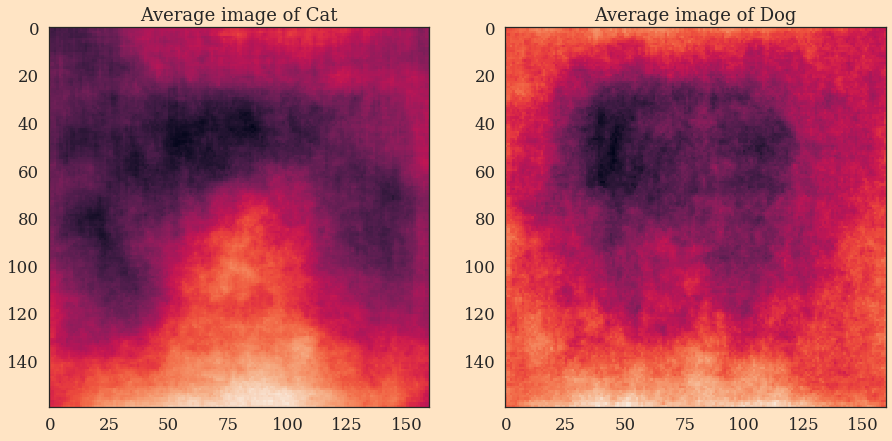

In [0]:
def show_averaged_image(dataset):
  fig, axs = plt.subplots(1,2, sharex='col',figsize=(15,15),facecolor='bisque')
  for j in range(0,2):
   if j==0: 
     str_label='Cat'
   elif j==1: 
     str_label='Dog'
   Averaged_image=np.array(0)
   Averaged_image = np.array([animal[0].T for i, animal in enumerate(dataset) if training_label[i]==j]).mean(axis=0)
   
   axs[j].imshow(Averaged_image)
   axs[j].set_title("Average image of {}".format(str_label))  
  plt.show()

show_averaged_image(trainTranspose)

In [0]:
#%tensorflow_version 1.x
#import tensorflow

## Define the Neural Network Model/Architecture

## Vanilla Model

In [0]:
#https://medium.com/@sakeshpusuluri123/activation-functions-and-weight-initialization-in-deep-learning-ebc326e62a5c
# As their is no strong theory for choosing right weight initialization, we just have some rule of thumb methods i.e.,
#   - When we have sigmoid activation function, it is better to use Xavier Glorot initialization of weights.
#   - When we have ReLU activation function, it is better to use He-initialization of weights.

#In He- initialization also,we set weights neither too big nor two small. Hence, we won’t face the problem of vanishing gradients and exploding gradients. Also, this initialization helps in faster convergence to minima.
# https://blog.goodaudience.com/visualizing-various-filter-initializers-in-keras-ca14c996db22

import time
print("Starting...\n")
start_time = time.time()

optimizer = RMSprop(lr=1e-4) # An optimizer: to update network as it sees more data and reduce loss value
objective = 'binary_crossentropy' 
# A loss function: to measure how good the network is
# Metrics: to monitor performance of network

def define_catdog_classifier_model():
    model = Sequential() # Keras Sequential layer.
    # Convolution2D = Convolutional Neural Network; CNNs are extremely efficient for images.
    
    
    # Stack of 4 convolution layers with a ReLU activation and followed by max-pooling layers.
    
    # Stack #1
    # Conv2D adds a convolution layer with 32 filters that generates 2 dimensional
    # feature maps to learn different aspects of our image
    model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(3, ROWS, COLS), activation='relu',kernel_initializer='he_uniform'))
    # In 1st layer of the model we have to define input dimensions of our data in (rows,columns,colour channel) format.
    model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu',kernel_initializer='he_uniform'))
    # MaxPooling2D layer reduces the size of the image representation our
    # convolutional layers learnt, and in doing so it reduces the number of
    # parameters and computations the network needs to perform.
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    
    # Stack #2
    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu',kernel_initializer='he_uniform'))
    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu',kernel_initializer='he_uniform'))
    # The informative features are obtained by max pooling layers applied at different steps in the architecture.
    # Pooling The pooling layer reduce the size of the image representation and so the number of parameters 
    # and computation in the network. Pooling usually involves taking either the maximum or average value across
    # the pooled area.
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Stack 3
    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu',kernel_initializer='he_uniform'))
    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu',kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    
    # Stack 4
    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu',kernel_initializer='he_uniform'))
    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu',kernel_initializer='he_uniform'))
#   model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    #model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu')) # added new
    #model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu')) # added new
    #model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu')) # added new
    #model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))                  # added new

    # Flatten will transform our 3D feature maps to 1D feature vectors
    # Flattens our array so we can feed the convolution layer outputs (a matrix)
    # into our fully connected layer (an array)
    model.add(Flatten())
    
    # Build a classifier model to put on top of the convolutional model
    # Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer.
    # Dense layer creates dense, fully connected layers with x inputs and y outputs
    # - it simply outputs the dot product of our inputs and weights
    model.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
    # Dropout layer turns off a percentage of neurons at every step
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    # In the last layer we have to specify output dimensions/classes of the model. Here it's 1, since we have to predct whether the image is of a dog or cat.
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    print("\n\nCompliling Model ...\n")
    # Compile the model and specify the optimizer and loss function
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    
    return model


model_vanilla = define_catdog_classifier_model()

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nElapsed Time: " + elapsed_time)
print("\n")

Starting...



Compliling Model ...


Elapsed Time: 00:00:00




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(3, 100, 1..., activation="relu", kernel_initializer="he_uniform", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 AP

In [0]:
#optimizer='sgd', loss='categorical_crossentropy'
#optimizer='Adam'
#optimizer = 'rmsprop', loss = 'binary_crossentropy'

In [0]:
IMG_SIZE=160 #160
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tensorflow.keras.applications.MobileNetV2(input_shape=(IMG_SHAPE),
                                               include_top=False,
                                               weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
9412608/9406464 [==============================] - 1s 0us/step


In [0]:
base_model.trainable = False
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
#feature_batch = base_model(image_batch)
#print(feature_batch.shape)

global_average_layer = tensorflow.keras.layers.GlobalAveragePooling2D()
#feature_batch_average = global_average_layer(feature_batch)
#print(feature_batch_average.shape)

prediction_layer = tensorflow.keras.layers.Dense(1,activation='sigmoid')
#prediction_batch = prediction_layer(feature_batch_average)
#print(prediction_batch.shape)

model_tl = tensorflow.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.0001
model_tl.compile(optimizer=tensorflow.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])
len(model_tl.trainable_variables)
model_tl.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
import time
print("Starting...\n")
start_time = time.time()

initial_epochs = 10 #original-10
batch_size =16 # last iter: 30; original-16

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        self.accuracy = []
        self.val_accuracy = []
    # The loss and accuracy data of the model for each epoch is stored in the history object.    
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.accuracy.append(logs.get('acc'))
        self.val_accuracy.append(logs.get('val_acc'))
        
#We use validation loss as the monitoring parameter which we need to minimize.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')        
        

history = LossHistory()
print("Training Model ...\n")
model_tl.fit(train, training_label, batch_size=batch_size, epochs=initial_epochs,
              validation_split=0.20, verbose=1, shuffle=True, callbacks=[history, early_stopping])
predictions = model_tl.predict(test, verbose=1)
#return predictions, history


elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nElapsed Time: " + elapsed_time)
print("\n")

Starting...

Training Model ...

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 18s 885us/sample - loss: 0.1646 - acc: 0.9312 - val_loss: 1.2007 - val_acc: 0.5574
Epoch 2/10
20000/20000 [==============================] - 18s 894us/sample - loss: 0.1642 - acc: 0.9340 - val_loss: 1.0992 - val_acc: 0.5628
Epoch 3/10
20000/20000 [==============================] - 18s 890us/sample - loss: 0.1602 - acc: 0.9338 - val_loss: 1.2440 - val_acc: 0.5550
Epoch 4/10
20000/20000 [==============================] - 18s 885us/sample - loss: 0.1623 - acc: 0.9331 - val_loss: 1.1599 - val_acc: 0.5618
Epoch 5/10
20000/20000 [==============================] - 18s 887us/sample - loss: 0.1580 - acc: 0.9370 - val_loss: 1.2304 - val_acc: 0.5596
Epoch 6/10
20000/20000 [==============================] - 18s 885us/sample - loss: 0.1582 - acc: 0.9362 - val_loss: 1.2017 - val_acc: 0.5614
Epoch 7/10
20000/20000 [==============================] - 18s 890us/samp

### **Plot training & validation accuracy values**

In [0]:
def plot_learning_accuracy(history,epochs_count):
  accuracy = history.accuracy
  val_accuracy = history.val_accuracy

  from matplotlib.font_manager import FontProperties
  font = FontProperties()
  font.set_family('serif')
  font.set_name('Times New Roman')

  plt.figure(figsize=[15,5],facecolor='bisque')
  plt.xlabel('Epochs', backgroundcolor='bisque',fontstyle='italic')
  plt.ylabel('Loss', backgroundcolor='bisque',fontstyle='italic')
  plt.title('Accuracy Trend')
  plt.plot(accuracy, 'lightslategrey', label='Training Accuracy', linewidth=4,linestyle='dashed')
  plt.plot(val_accuracy, 'indianred', label='Validation Accuracy',linewidth=4)
  plt.xticks(range(0,epochs_count)[0::2])
  #range(1,50)
  plt.legend()
  plt.show()
  
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html

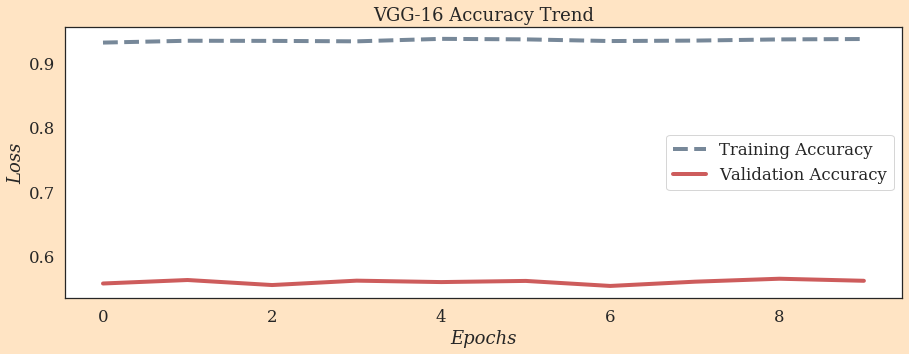

In [0]:
plot_learning_accuracy(history,initial_epochs)

### **Plot training & validation loss values**

In [0]:
def plot_learning_loss(history,epochs_count):
  loss = history.losses
  val_loss = history.val_losses

  from matplotlib.font_manager import FontProperties
  font = FontProperties()
  font.set_family('serif')
  font.set_name('Times New Roman')

  plt.figure(figsize=[15,5],facecolor='bisque')
  plt.xlabel('Epochs',backgroundcolor='bisque',fontstyle='italic')
  plt.ylabel('Loss',backgroundcolor='bisque',fontstyle='italic')
  plt.title('Loss Trend')
  plt.plot(loss, 'lightslategrey', label='Training Loss',linewidth=4,linestyle='dashed')
  plt.plot(val_loss, 'indianred', label='Validation Loss',linewidth=4)
  plt.xticks(range(0,epochs_count)[0::2])
  plt.legend()
  plt.show()

# If the two curves start to depart consistently, it might be a sign to stop training at an earlier epoch.

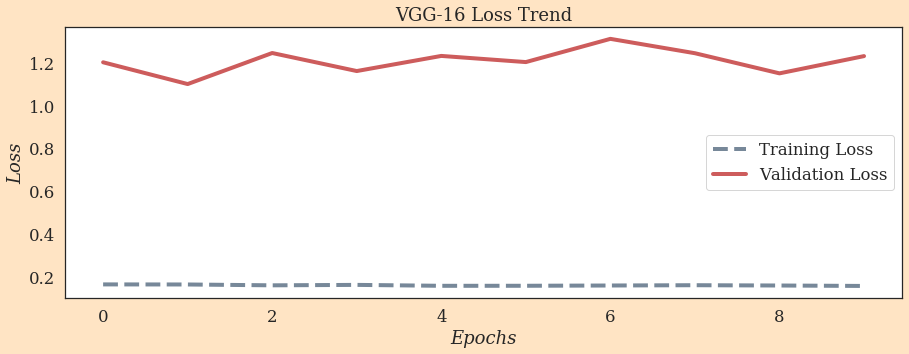

In [0]:
plot_learning_loss(history,initial_epochs)

## Further improve the accuracy with a trainable layer of transfer learning

In [0]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100 # 85,original =100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [0]:
model_tl.compile(loss='binary_crossentropy',
              optimizer = tensorflow.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])
model_tl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [0]:
len(model_tl.trainable_variables) #58 originally

58

In [0]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

#We use validation loss as the monitoring parameter which we need to minimize.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')        
        

history_2 = LossHistory()
print("Training Model ...\n")
model_tl.fit(train, training_label, batch_size=batch_size, epochs=total_epochs,initial_epoch=initial_epochs,
              validation_split=0.20, verbose=1, shuffle=True, callbacks=[history_2, early_stopping])
predictions = model_tl.predict(test, verbose=1)

Training Model ...

Train on 20000 samples, validate on 5000 samples
Epoch 11/20
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.0222 - acc: 0.9926 - val_loss: 1.2213 - val_acc: 0.6008
Epoch 12/20
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.0166 - acc: 0.9942 - val_loss: 1.3122 - val_acc: 0.5892
Epoch 13/20
20000/20000 [==============================] - 31s 2ms/sample - loss: 0.0164 - acc: 0.9942 - val_loss: 1.3692 - val_acc: 0.5912
Epoch 14/20
20000/20000 [==============================] - 30s 1ms/sample - loss: 0.0135 - acc: 0.9961 - val_loss: 1.4776 - val_acc: 0.5946
Epoch 15/20
20000/20000 [==============================] - 30s 1ms/sample - loss: 0.0146 - acc: 0.9954 - val_loss: 1.5885 - val_acc: 0.5846
Epoch 16/20
20000/20000 [==============================] - 29s 1ms/sample - loss: 0.0139 - acc: 0.9966 - val_loss: 1.9200 - val_acc: 0.5758
Epoch 17/20
20000/20000 [==============================] - 30s 1ms/sample - loss: 0.0120 - 

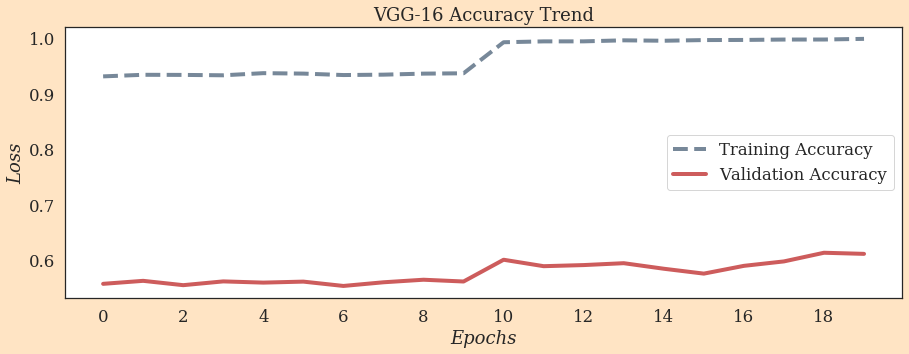

In [0]:
  history.accuracy+=history_2.accuracy
  history.val_accuracy+=history_2.val_accuracy
  
  plot_learning_accuracy(history,total_epochs) 

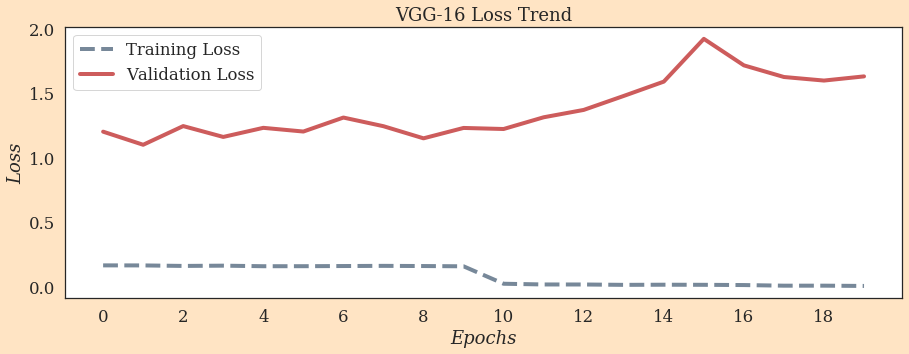

In [0]:
history.losses+=history_2.losses
history.val_losses+=history_2.val_losses
plot_learning_loss(history,total_epochs)

## Visualize the Neural Network Model

In [0]:
model_tl.summary()
print("\nLayers in Neural Network Model: ",len(model_tl.layers))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________

Layers in Neural Network Model:  3


## **Fit the Neural Network Model**

In [0]:
#model=model_tl
import time
print("Starting...\n")
start_time = time.time()

nb_epoch = 20 #original-10
batch_size =16 # last iter: 30; original-16

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        self.accuracy = []
        self.val_accuracy = []
    # The loss and accuracy data of the model for each epoch is stored in the history object.    
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.accuracy.append(logs.get('acc'))
        self.val_accuracy.append(logs.get('val_acc'))
        
#We use validation loss as the monitoring parameter which we need to minimize.
early_stopping = EarlyStopping(monitor='val_loss', patience=6, verbose=1, mode='auto')        
        
def train_catdog_classifier_model():
    history = LossHistory()
    print("Training Model ...\n")
    model.fit(train, training_label, batch_size=batch_size, epochs=nb_epoch,
              validation_split=0.20, verbose=1, shuffle=True, callbacks=[history, early_stopping])
    # Validation_split: Float between 0 and 1. The fraction of the training data to be used as validation data.
    # The model will set apart this fraction of the training data, will not train on it, and will evaluate the 
    # loss and any model metrics on this data at the end of each epoch. The validation data is selected from the 
    # last samples in the x and y data provided, before shuffling    

    predictions = model.predict(test, verbose=1)
    return predictions, history

predictions, history = train_catdog_classifier_model()


elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nElapsed Time: " + elapsed_time)
print("\n")

Starting...

Training Model ...

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
19984/20000 [============================>.] - ETA: 0s - loss: 2.3590 - acc: 0.7203

KeyboardInterrupt: ignored

## **Training history visualization**

To evaluate the Underfitting or Overfitting: One of the primary difficulties in any Machine Learning approach is to make the model generalized so that it is good in predicting reasonable!e results with the new data and not just on the data it has already been trained on. Visualizing the training loss vs. validation loss or training accuracy vs. validation accuracy over a number of epochs is a good way to determine if the model has been sufficiently trained. This is important so that the model is not undertrained and not overtrained such that it starts memorizing the training data which will, in turn, reduce its ability to predict accurately.

https://scikit-learn.org/stable/modules/learning_curve.html

## **Analyzing results**

In [0]:
# Process_predictions
pred_list = []
index=0
for img in tqdm(predictions):
    pred_list.append(img)
    index=index+1
pred_list_cleaned = []
for line_item in tqdm(pred_list):
    pred_list_cleaned.append(line_item[0])
prediction_probability=pd.Series(pred_list_cleaned)

100%|██████████| 12500/12500 [00:00<00:00, 1055478.83it/s]


ValueError: ignored

In [0]:
test_data_proc = []
for img in tqdm(os.listdir(TEST_DIR)):
    path = os.path.join(TEST_DIR,img)
    img_num = img.split('.')[0]
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    test_data_proc.append([np.array(img), img_num])

100%|██████████| 12500/12500 [00:25<00:00, 482.62it/s]


In [0]:
# Get index numbers for test data
image_index=[]
index=0
for data in tqdm(test_data_proc):
        #if index==0: print(index,data,data[1])
        image_index.append(data[1])
        index=index+1
counter=pd.Series(image_index)
#counter=pd.Series(image_index)[:25]

#Create submission df
submission_df = pd.DataFrame({"id": counter, "label":list(prediction_probability)})

100%|██████████| 12500/12500 [00:00<00:00, 851089.25it/s]


In [0]:
display(submission_df,10)

,id,label
0,2404,0.999027
1,1552,0.976378
2,10095,0.802396
3,4902,0.454383
4,7722,0.999057
...,...,...
12495,11330,0.003139
12496,625,0.006360
12497,7620,0.999466
12498,10258,0.999873


10

In [0]:
#submission_df.sort_values(by=["id"], ascending=True)
submission_df

,id,label
0,2404,0.999027
1,1552,0.976378
2,10095,0.802396
3,4902,0.454383
4,7722,0.999057
...,...,...
12495,11330,0.003139
12496,625,0.006360
12497,7620,0.999466
12498,10258,0.999873


In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
submission_df.to_csv('submission.csv')

In [0]:
#!cp submission.csv drive/My\ Drive/
from google.colab import files
files.download("submission.csv")

Classified as a Dog with 99.90% certainty


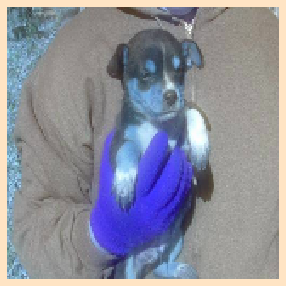

Classified as a Dog with 97.64% certainty


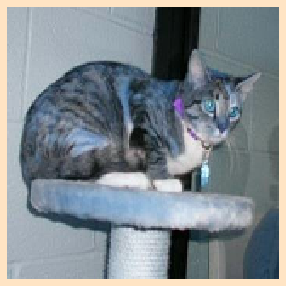

Classified as a Dog with 80.24% certainty


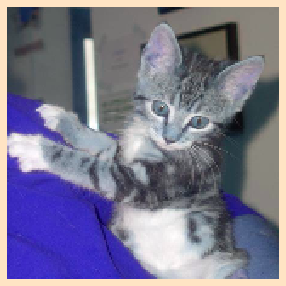

Classified as a Cat with 54.56% certainty


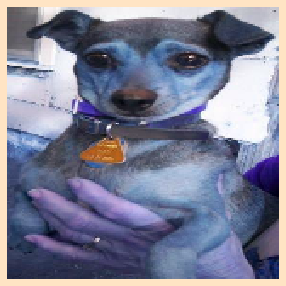

Classified as a Dog with 99.91% certainty


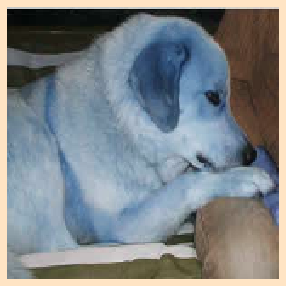

Classified as a Dog with 99.97% certainty


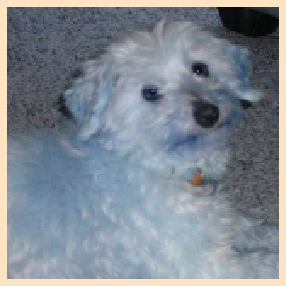

Classified as a Dog with 83.79% certainty


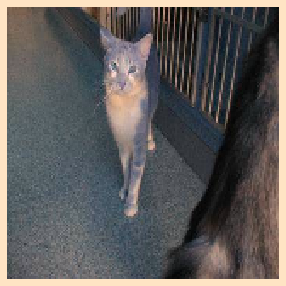

Classified as a Dog with 100.00% certainty


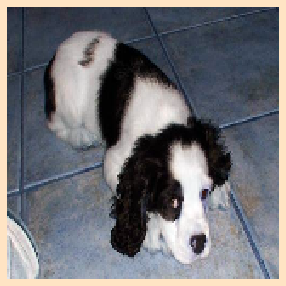

Classified as a Cat with 99.99% certainty


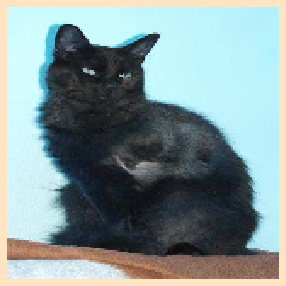

Classified as a Dog with 100.00% certainty


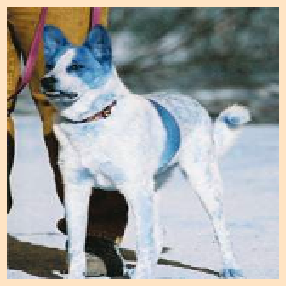

Classified as a Dog with 97.74% certainty


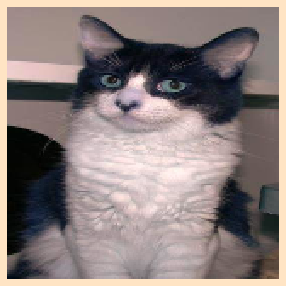

Classified as a Cat with 94.26% certainty


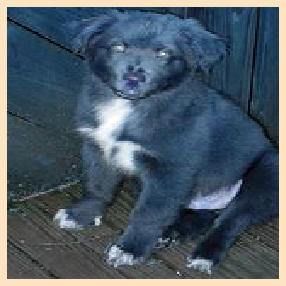

Classified as a Cat with 71.85% certainty


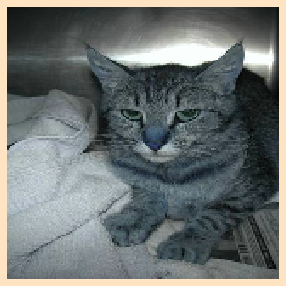

Classified as a Dog with 99.37% certainty


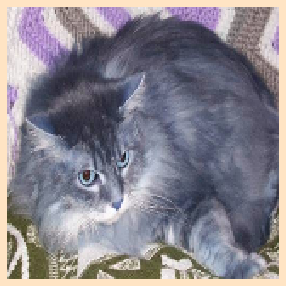

Classified as a Dog with 99.98% certainty


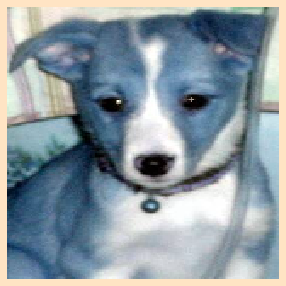

Classified as a Dog with 99.99% certainty


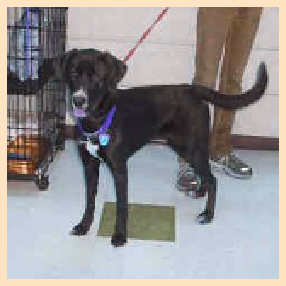

Classified as a Dog with 78.18% certainty


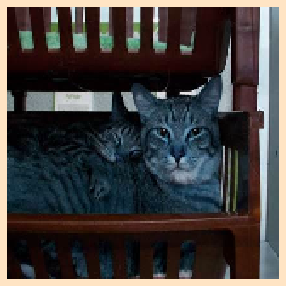

Classified as a Dog with 88.70% certainty


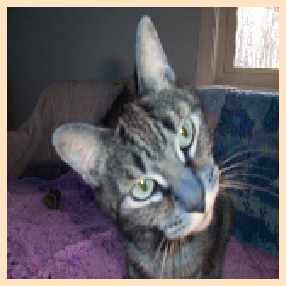

Classified as a Cat with 53.39% certainty


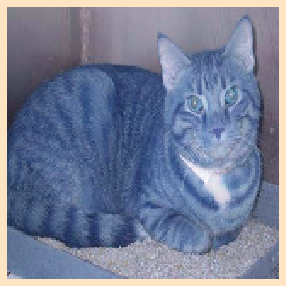

Classified as a Dog with 82.44% certainty


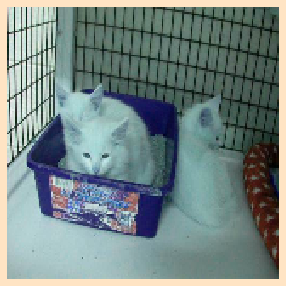

Classified as a Dog with 63.90% certainty


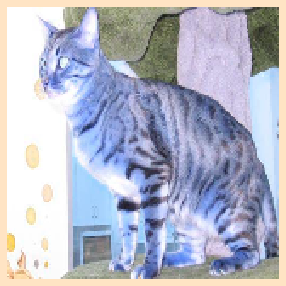

Classified as a Dog with 99.38% certainty


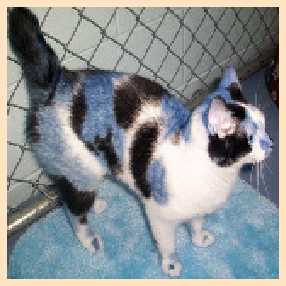

Classified as a Dog with 99.99% certainty


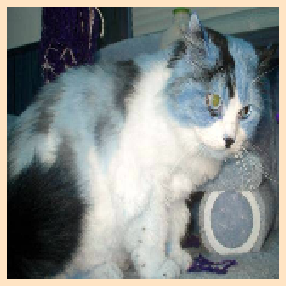

Classified as a Cat with 96.39% certainty


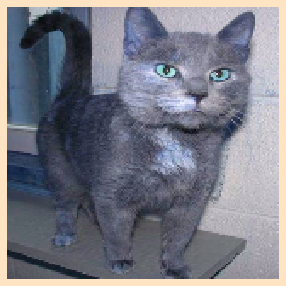

Classified as a Cat with 94.88% certainty


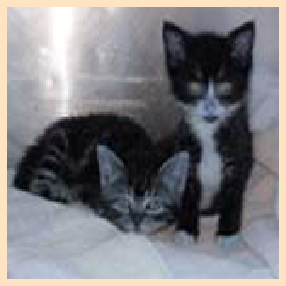

In [0]:
for i in range(0,25):
    if predictions[i, 0] >= 0.5: print("Classified as a Dog with {:.2%} certainty".format(predictions[i][0]))
    else: print("Classified as a Cat with {:.2%} certainty".format(1-predictions[i][0]))
    plt.figure(figsize=(5,5),facecolor='bisque')
    plt.axis('off')    
    plt.imshow(test[i])
    plt.show()
# # Visualize the prediction
# def plot_figure(dataset,count):
#   fig, axs = plt.subplots(count,1,figsize=(50,50),facecolor='bisque') #sharex='col'
#   for i in range(0,count):
#      image = read_image(dataset[i]) 
#      axs[i].imshow(image)
#      axs[i].axis('off')
#      if y_pred[i]>0.5: str_label='Dog'
#      else: str_label='Cat'
#      axs[i].set_title("Model Prediction:{}".format(str_label)) 
#   plt.show()

# plot_figure(test_images,15)

In [0]:
#https://www.kaggle.com/sentdex/full-classification-example-with-convnet
# with open('submission_file_v0.csv','w') as f:
#     f.write('id,label\n')
            
# with open('submission_file_v0.csv','a') as f:
#     for data in tqdm(test_data):  #test_data
#         img_num = data[1]
#         img_data = data[0]
#         orig = img_data
#         print(img_data.shape)
#         data = img_data.reshape(IMG_SIZE,IMG_SIZE,3)
#         model_out = model_tl.predict([data])[0]
#         f.write('{},{}\n'.format(img_num,model_out[1]))


In [0]:
# https://www.kaggle.com/sentdex/full-classification-example-with-convnet